### Experimental Parameters

In [1]:
import numpy as np
import pickle as pkl
%matplotlib inline

proposal_rates = np.array([1/300, 1/120, 1/60, 1/30, 1/10, 1/5, 1/2])
n_trials = 3

### Setup JSON File

In [12]:
import sys
import json

# Create experimental parameters and write to JSON file
max_block_size = 50
TX_rate = 5

params = {'Block proposal rate parameter': 0,
 'Block size (txs)': max_block_size,
 'Duration (sec)': 0,
 'Transaction rate parameter': TX_rate, # 1 second
 'Fork choice rule': 'longest-chain',
 'Network model': 'Decker-Wattenhorf',
 'Number of adversaries': 1,
 'Number of nodes': 100,
 'Probability of error in transaction confirmation': 0.01,
 'Transaction dataset': 'poisson',
 'Transaction scheduling rule': 'FIFO',
 'Logging enabled': True
         }

### Run experiments

In [3]:
import os, shutil, pprint, glob, csv

os.chdir('/mnt/c/Users/Kelvin/Desktop/course_repo/Blockchain/blockchain-simulator/')

pp = pprint.PrettyPrinter()
os.system('touch results/longest_chain.json')

import metrics
import uuid
from main import main

throughputs = {}
throughputs_unique = {}
main_chain_arrival_latencies = {}
finalization_latencies = {}

print(os.getcwd())
    
for i in range(0, len(proposal_rates)):
    rate = proposal_rates[i]
    params['Block proposal rate parameter'] = rate
    params['Duration (sec)'] = 50/rate
    d = {}
    d['setting-name'] = f'longest-chain-test'
    d[f'longest-chain-test'] = params
    print('Parameters:')
    pp.pprint(d)
    with open('results/longest_chain.json', 'w+') as outfile:
        json.dump(d, outfile)
    throughputs[rate] = []
    throughputs_unique[rate] = []
    main_chain_arrival_latencies[rate] = []
    finalization_latencies[rate] = []
    for trial in range(0, n_trials):
        main('results/longest_chain.json')
#         os.system('python3 main.py -f results/bitcoin_ng.json')
        throughput, throughput_unique = metrics.compute_throughputs(filename='results/longest_chain.json')
        avg_main_chain_arrival_latency, avg_finalization_latency = metrics.compute_latency()
        
        
        shutil.copytree('./logs', './logs_{0}'.format(uuid.uuid4()) )
        
        throughputs[rate].append(throughput)
        throughputs_unique[rate].append(throughput_unique)
        main_chain_arrival_latencies[rate].append(avg_main_chain_arrival_latency)
        finalization_latencies[rate].append(avg_finalization_latency)

    
os.remove('results/longest_chain.json')
print('Throughputs:\n', throughputs)
print('Unique Throughputs:\n', throughput_unique)
print('Main Chain Arrival Latencies:\n', main_chain_arrival_latencies)
print('Finalization Latencies:\n', finalization_latencies)

/mnt/c/Users/Kelvin/Desktop/course_repo/Blockchain/blockchain-simulator
Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.0033333333333333335,
                        'Block size (txs)': 50,
                        'Duration (sec)': 14999.999999999998,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 74712/74712 [15:02<00:00, 82.78it/s] 


Complete! Logging results


100%|██████████| 75304/75304 [16:01<00:00, 78.32it/s] 


Complete! Logging results


100%|██████████| 75364/75364 [15:27<00:00, 81.26it/s] 


Complete! Logging results
Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.008333333333333333,
                        'Block size (txs)': 50,
                        'Duration (sec)': 6000.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 30593/30593 [02:35<00:00, 196.95it/s]


Complete! Logging results


100%|██████████| 30126/30126 [02:29<00:00, 201.14it/s]


Complete! Logging results


100%|██████████| 30000/30000 [02:27<00:00, 202.85it/s]


Complete! Logging results
Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.016666666666666666,
                        'Block size (txs)': 50,
                        'Duration (sec)': 3000.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 14909/14909 [00:44<00:00, 338.29it/s]


Complete! Logging results


100%|██████████| 14997/14997 [00:43<00:00, 345.39it/s]


Complete! Logging results


100%|██████████| 14943/14943 [00:44<00:00, 338.59it/s]


Complete! Logging results


  0%|          | 0/7684 [00:00<?, ?it/s]

Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.03333333333333333,
                        'Block size (txs)': 50,
                        'Duration (sec)': 1500.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 7684/7684 [00:16<00:00, 474.92it/s] 


Complete! Logging results


100%|██████████| 7526/7526 [00:15<00:00, 492.61it/s]


Complete! Logging results


100%|██████████| 7617/7617 [00:16<00:00, 469.96it/s]


Complete! Logging results


  7%|▋         | 180/2466 [00:00<00:01, 1773.23it/s]

Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.1,
                        'Block size (txs)': 50,
                        'Duration (sec)': 500.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 2466/2466 [00:04<00:00, 555.46it/s]


Complete! Logging results


100%|██████████| 2501/2501 [00:03<00:00, 743.77it/s] 


Complete! Logging results


100%|██████████| 2517/2517 [00:03<00:00, 644.81it/s]


Complete! Logging results
Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.2,
                        'Block size (txs)': 50,
                        'Duration (sec)': 250.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


100%|██████████| 1295/1295 [00:01<00:00, 795.45it/s]


Complete! Logging results


100%|██████████| 1314/1314 [00:01<00:00, 793.68it/s]


Complete! Logging results


100%|██████████| 1340/1340 [00:01<00:00, 803.14it/s]


Complete! Logging results
Parameters:
{'longest-chain-test': {'Block proposal rate parameter': 0.5,
                        'Block size (txs)': 50,
                        'Duration (sec)': 100.0,
                        'Fork choice rule': 'longest-chain',
                        'Logging enabled': True,
                        'Network model': 'Decker-Wattenhorf',
                        'Number of adversaries': 1,
                        'Number of nodes': 100,
                        'Probability of error in transaction confirmation': 0.01,
                        'Transaction dataset': 'poisson',
                        'Transaction rate parameter': 5,
                        'Transaction scheduling rule': 'FIFO'},
 'setting-name': 'longest-chain-test'}


  0%|          | 0/545 [00:00<?, ?it/s]

Complete! Logging results


  0%|          | 0/570 [00:00<?, ?it/s]

Complete! Logging results


100%|██████████| 570/570 [00:00<00:00, 1051.38it/s]


Complete! Logging results
Throughputs:
 {0.0033333333333333335: [2.9274000000000004, 2.9274000000000004, 4.685200000000001], 0.008333333333333333: [8.041, 10.8375, 11.713], 0.016666666666666666: [13.26, 13.169, 30.09], 0.03333333333333333: [23.902, 35.926, 36.416666666666664], 0.1: [97.108, 56.034, 63.19], 0.2: [73.004, 79.608, 85.276], 0.5: [62.7, 60.32, 35.39]}
Unique Throughputs:
 4.1
Main Chain Arrival Latencies:
 {0.0033333333333333335: [6381.214644116133, 6854.279421448953, 6630.73808312925], 0.008333333333333333: [2069.4148063063276, 2188.3591907479627, 2318.360647644361], 0.016666666666666666: [1023.2241846981781, 1110.7663874995603, 978.3560807355376], 0.03333333333333333: [406.08944341666484, 347.47263003938093, 436.4384899621516], 0.1: [34.77856325869933, 74.45819323432049, 58.79593599634249], 0.2: [8.98065875854089, 10.006910652577332, 6.202778250520209], 0.5: [2.6956665854770776, 3.133414838554133, 4.6779889158889665]}
Finalization Latencies:
 {0.0033333333333333335: [698.

### Compute Averages

Average main chain latency is the time for a transaction to be added to the global blocktree - the timestamp the transaction was created.

Average finalization latency is the time for a transaction to be k blocks deep - to be added to the global blocktree.

In [4]:
avg_main_chain_latencies = {}
for rate in main_chain_arrival_latencies:
    avg_main_chain_latencies[rate] = sum(main_chain_arrival_latencies[rate])/len(main_chain_arrival_latencies[rate])

print("Average Main Chain Arrival Latency:", avg_main_chain_latencies)
avg_finalization_latencies = {}
for rate in finalization_latencies:
    avg_finalization_latencies[rate] = sum(finalization_latencies[rate])/len(finalization_latencies[rate])
    
print("Average Finalization Latency:", avg_finalization_latencies)

avg_throughput = {}
for rate in throughputs:
    avg_throughput[rate] = sum(throughputs[rate])/len(throughputs[rate])
    
print("Average Throughput Latency:", avg_throughput)

avg_unique_throughput = {}
for rate in throughputs_unique:
    avg_unique_throughput[rate] = sum(throughputs_unique[rate])/len(throughputs_unique[rate])
    
print("Average Unique Throughput Latency:", avg_unique_throughput)

Average Main Chain Arrival Latency: {0.0033333333333333335: 6622.077382898112, 0.008333333333333333: 2192.044881566217, 0.016666666666666666: 1037.448884311092, 0.03333333333333333: 396.66685447273244, 0.1: 56.010897496454106, 0.2: 8.396782553879477, 0.5: 3.502356779973392}
Average Finalization Latency: {0.0033333333333333335: 639.5524110988681, 0.008333333333333333: 237.14457271626225, 0.016666666666666666: 128.03554309966253, 0.03333333333333333: 66.4824736851486, 0.1: 25.022082409965137, 0.2: 12.746297503562614, 0.5: 7.5119236570892225}
Average Throughput Latency: {0.0033333333333333335: 3.513333333333334, 0.008333333333333333: 10.197166666666668, 0.016666666666666666: 18.83966666666667, 0.03333333333333333: 32.08155555555555, 0.1: 72.11066666666666, 0.2: 79.296, 0.5: 52.80333333333334}
Average Unique Throughput Latency: {0.0033333333333333335: 0.15186666666666668, 0.008333333333333333: 0.41083333333333333, 0.016666666666666666: 0.775111111111111, 0.03333333333333333: 1.453333333333

### Extract Finalization Depth and Delta for Blocks

In [5]:
import csv
with open('logs/stats.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0]=='Finalization depth':
            k = int(row[1])
        elif row[0]=='Average network latency for blocks (sec)':
            delta = float(row[1])
print(delta)
print(k)


1.5833333333333335
2


In [6]:
bitcoin_ng_data = {}
bitcoin_ng_data['throughputs'] = throughputs
bitcoin_ng_data['throughputs_unique'] = throughputs_unique
bitcoin_ng_data['main_chain_arrival_latencies'] = main_chain_arrival_latencies
bitcoin_ng_data['finalization_latencies'] = finalization_latencies
bitcoin_ng_data['k'] = k
bitcoin_ng_data['delta'] = delta

pkl.dump(bitcoin_ng_data, open('longest-chain-data.pkl', 'wb'))

In [7]:
# bitcoin_ng_data = pkl.load( open( "longest-chain-data-final.pkl", "rb" ) )
# throughputs = bitcoin_ng_data['throughputs']
# throughputs_unique = bitcoin_ng_data['throughputs_unique']
# main_chain_arrival_latencies = bitcoin_ng_data['main_chain_arrival_latencies']
# finalization_latencies = bitcoin_ng_data['finalization_latencies']
# k = bitcoin_ng_data['k']
# delta = bitcoin_ng_data['delta']
# max_block_size = 50

### Plotting the results

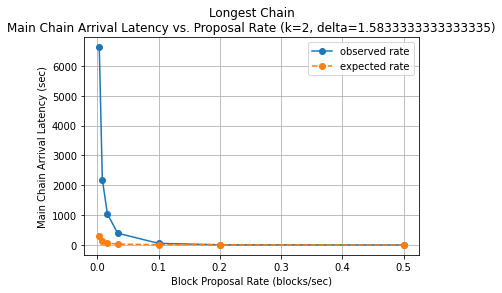

In [24]:
import matplotlib.pylab as plt
x = avg_main_chain_latencies.keys()
y1 = avg_main_chain_latencies.values()
expected_y1 = (delta+1.0/proposal_rates)
y2 = avg_finalization_latencies.values()
expected_y2 = k*(delta+1.0/proposal_rates)

y3 = avg_unique_throughput.values()
T = list(map(lambda x: min(x, max_block_size),  TX_rate/proposal_rates)) # transaction per block, 1 Tx per second / x blocks / sec = tx / block
expected_y3 = proposal_rates*T/(1+proposal_rates*delta)

plt.xlabel('Block Proposal Rate (blocks/sec)')
plt.ylabel('Main Chain Arrival Latency (sec)')
plt.title(f'Longest Chain\nMain Chain Arrival Latency vs. Proposal Rate (k={k}, delta={delta})')
plt.grid(True)

plt.plot(x, y1, 'o-', label='observed rate')
plt.plot(x, expected_y1, 'o--', label='expected rate')
plt.legend()
plt.show()

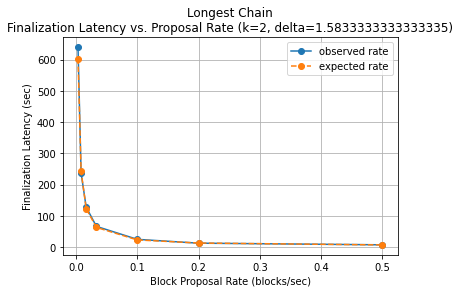

In [25]:
plt.xlabel('Block Proposal Rate (blocks/sec)')
plt.ylabel('Finalization Latency (sec)')
plt.title(f'Longest Chain\nFinalization Latency vs. Proposal Rate (k={k}, delta={delta})')
plt.grid(True)

plt.plot(x, y2, 'o-', label='observed rate')
plt.plot(x, expected_y2, 'o--', label='expected rate')
plt.legend()
plt.show()

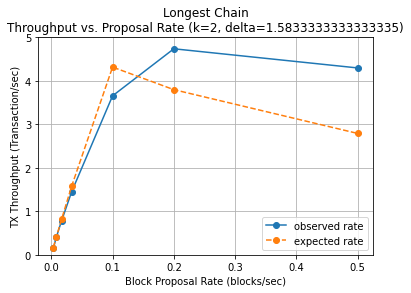

In [26]:
plt.xlabel('Block Proposal Rate (blocks/sec)')
plt.ylabel('TX Throughput (Transaction/sec)')
plt.title(f'Longest Chain\nThroughput vs. Proposal Rate (k={k}, delta={delta})')
plt.grid(True)


plt.plot(x, y3, 'o-', label='observed rate')
plt.plot(x, expected_y3, 'o--', label='expected rate')
plt.legend()
plt.ylim([0, TX_rate])
plt.show()